In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('goog.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [28]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

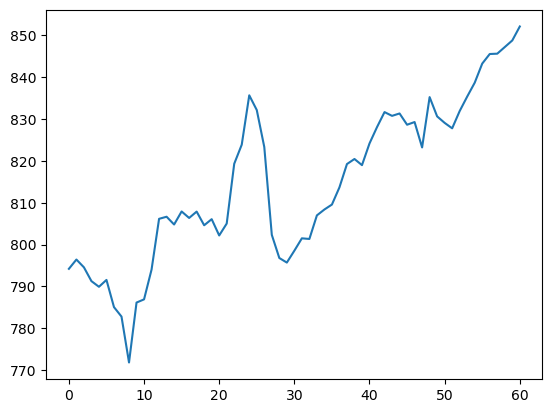

In [29]:
plt.plot(df['Close'])

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(np.array(df['Close']).reshape(-1,1))

In [32]:
training_size = int(len(df_normalized)*0.8)
train_data, test_data = df_normalized[:training_size, :], df_normalized[training_size:, :]

In [33]:
len(train_data), len(test_data)

(48, 13)

In [34]:
def create_dataset(data, step = 4):
    x = []
    y = []
    for i in range(len(data)-step):
        x.append(data[i:i+step, 0])
        y.append(data[i+step, 0])
    return np.array(x), np.array(y)

In [35]:
X_train, Y_train = create_dataset(train_data)
X_test, Y_test = create_dataset(test_data)

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM

In [37]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2677  
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2315
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1995
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1820
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1477
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1144
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0979
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0730
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0468
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0323
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0203
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0198
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0286
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0346
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0344
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

In [39]:
metrics = model.evaluate(X_test, Y_test)
metrics

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0311


0.031085319817066193

In [40]:
Y_pred = scaler.inverse_transform(model.predict(X_test))
Y_test = scaler.inverse_transform(np.array(Y_test).reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  13.817667565104166
MSE:  200.44070413994982
RMSE:  14.157708294068987


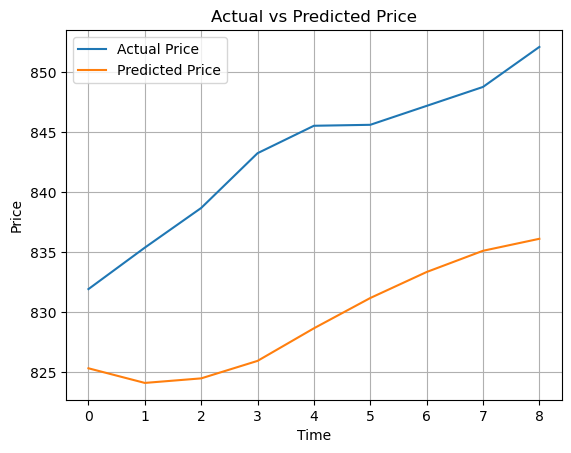

In [43]:
plt.plot(Y_test, label='Actual Price')
plt.plot(Y_pred, label='Predicted Price')
plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()